In [1]:
import numpy as np
X=2*np.random.rand(100,1)
y=4+3*X+np.random.rand(100,1)

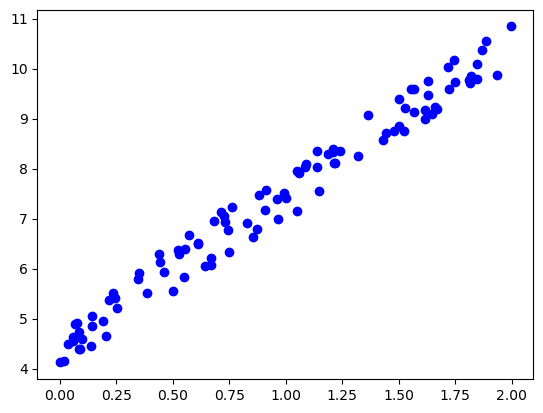

In [2]:
import matplotlib.pyplot as plt
plt.scatter(X,y,c='b')
plt.show()

In [4]:
X

array([[1.31778643e+00],
       [3.52788761e-01],
       [6.60938289e-02],
       [1.61441327e+00],
       [1.99563838e+00],
       [1.86937210e+00],
       [5.93693439e-02],
       [1.67053360e+00],
       [4.37366297e-01],
       [1.20952914e+00],
       [3.46492282e-02],
       [8.89233567e-02],
       [6.10521645e-01],
       [7.62982679e-01],
       [1.62906520e+00],
       [1.08846332e+00],
       [6.70628245e-01],
       [1.61529270e+00],
       [8.82645008e-01],
       [1.50057530e+00],
       [8.30256911e-01],
       [1.04912460e+00],
       [1.08286639e+00],
       [9.90718932e-01],
       [1.49901434e+00],
       [1.84512961e+00],
       [9.71556305e-02],
       [6.12832299e-01],
       [7.49454710e-01],
       [1.13647250e+00],
       [1.24145247e+00],
       [4.42867728e-01],
       [9.13367778e-01],
       [7.44286504e-01],
       [1.36672361e-01],
       [1.81366493e+00],
       [1.18798037e+00],
       [7.24733778e-01],
       [1.84348097e+00],
       [2.52187047e-01],


In [3]:
X_b=np.c_[np.ones((100,1)),X] # 给X增加一列全为数据1的列
X_b

array([[1.00000000e+00, 1.31778643e+00],
       [1.00000000e+00, 3.52788761e-01],
       [1.00000000e+00, 6.60938289e-02],
       [1.00000000e+00, 1.61441327e+00],
       [1.00000000e+00, 1.99563838e+00],
       [1.00000000e+00, 1.86937210e+00],
       [1.00000000e+00, 5.93693439e-02],
       [1.00000000e+00, 1.67053360e+00],
       [1.00000000e+00, 4.37366297e-01],
       [1.00000000e+00, 1.20952914e+00],
       [1.00000000e+00, 3.46492282e-02],
       [1.00000000e+00, 8.89233567e-02],
       [1.00000000e+00, 6.10521645e-01],
       [1.00000000e+00, 7.62982679e-01],
       [1.00000000e+00, 1.62906520e+00],
       [1.00000000e+00, 1.08846332e+00],
       [1.00000000e+00, 6.70628245e-01],
       [1.00000000e+00, 1.61529270e+00],
       [1.00000000e+00, 8.82645008e-01],
       [1.00000000e+00, 1.50057530e+00],
       [1.00000000e+00, 8.30256911e-01],
       [1.00000000e+00, 1.04912460e+00],
       [1.00000000e+00, 1.08286639e+00],
       [1.00000000e+00, 9.90718932e-01],
       [1.000000

In [5]:
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # np.linalg.inv 是用于求解矩阵的逆函数

In [6]:
theta_best # 如果y=4+3*X 无噪声存在的情况下,theta_best 应该为 [4,3]

array([[4.47863693],
       [3.04037867]])

In [7]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]

In [8]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [9]:
y_predict=X_new_b.dot(theta_best)

In [10]:
y_predict

array([[ 4.47863693],
       [10.55939426]])

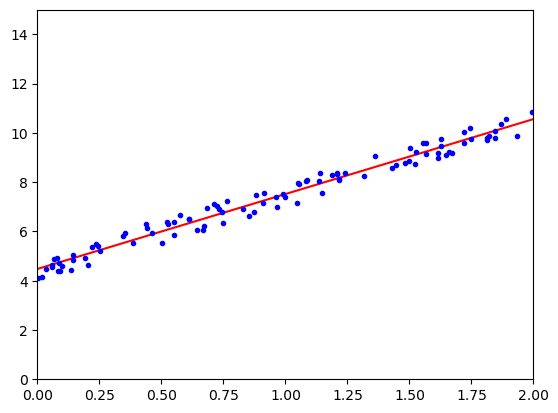

In [11]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [13]:
lin_reg.intercept_

array([4.47863693])

In [14]:
lin_reg.coef_

array([[3.04037867]])

In [15]:
lin_reg.predict(X_new)

array([[ 4.47863693],
       [10.55939426]])

In [16]:
theta_best_svd,residuals,rank,s=np.linalg.lstsq(X_b,y,rcond=1e-6)

In [17]:
theta_best_svd

array([[4.47863693],
       [3.04037867]])

In [18]:
eta=0.1
n_iterations=1000
m=100
theta=np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradients

In [19]:
theta

array([[4.47863693],
       [3.04037867]])

In [23]:
theta=np.array([[4.67456392],
               [3.2348531]])

In [24]:
n_epochs=50
t0,t1=5,50
def learning_schedule(t):
    return t0/(t+t1)
theta=np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradinets=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradients

In [25]:
theta

array([[ 1.43585298],
       [-1.41020122]])

In [ ]:
n_epochs = 50
   t0, t1 = 5, 50  # learning schedule hyperparameters
   def learning_schedule(t):
       return t0 / (t + t1)
   theta = np.random.randn(2,1)  # random initialization
   for epoch in range(n_epochs):
       for i in range(m):
           random_index = np.random.randint(m)
           xi = X_b[random_index:random_index+1]
           yi = y[random_index:random_index+1]
           gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
           eta = learning_schedule(epoch * m + i)
           theta = theta - eta * gradients